---
* ### Import as libs  

In [54]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from carima import *

---
* ### Constantes

In [55]:
# massas
m0 = 5
m1 = 1

# constantes de amortecimento
c0 = 1
c1 = 0.15

# constantes de rigidez
k0 = 1.0
k1 = 1.0

# modal participation factor
beta_0 = 0.33

---
* ### Matrizes

In [56]:
# Matriz de massa
M = sp.Matrix([[m0, 0],
               [0, m1]])

# Matriz de amortecimento
N = sp.Matrix([[c0 + c1, -c1],
                [-c1, c1]])

# Matriz de rigidez
K = sp.Matrix([[k0 + k1, -k1],
                [-k1, k1]])

# Matriz da entrada u
B = sp.Matrix([[-1],[1]])

# Matriz da entrada do deslocamento do solo
C = sp.Matrix([[beta_0*m0],[m1]])

---
* ### Funções de transferência

In [57]:
t, s = sp.symbols('t s', positive=True, real=True)

# M*x'' + N*x' + K*x = B*u + C*q
# (M*s**2 + N*s + K)*X = B*U + C*Q
# AX = BU + CQ
A = M*s**2 + N*s + K

# Função de transferência do sistema
H_U = A.inv() * B
H_Q = A.inv() * C

# Simplificação das expressões
H_U = sp.simplify(H_U)
H_Q = sp.simplify(H_Q)

# matriz de transferência do sistema 
H = sp.Matrix.hstack(H_U, H_Q)

print("X0/U (s) =", H_U[0,0])
print("X0/Q (s) =", H_Q[0,0])
print("X1/U (s) =", H_U[1,0])
print("X1/Q (s) =", H_Q[1,0])

X0/U (s) = -1.0*s**2/(5.0*s**4 + 1.9*s**3 + 7.15*s**2 + 1.15*s + 1.0)
X0/Q (s) = (1.65*s**2 + 0.3975*s + 2.65)/(5.0*s**4 + 1.9*s**3 + 7.15*s**2 + 1.15*s + 1.0)
X1/U (s) = (5.0*s**2 + 1.0*s + 1.0)/(5.0*s**4 + 1.9*s**3 + 7.15*s**2 + 1.15*s + 1.0)
X1/Q (s) = (5.0*s**2 + 1.3975*s + 3.65)/(5.0*s**4 + 1.9*s**3 + 7.15*s**2 + 1.15*s + 1.0)


---
* ### Excitação

In [58]:
# Parâmetros
'''Amp, alpha, omega, phi = sp.symbols('A alpha omega phi', positive=True, real=True)

pars = {
    Amp:   10,                  # amplitude
    alpha: sp.Rational(2, 5),   # 0.4 (use Rational p/ evitar erros numéricos)
    omega: 0.25,                # rad/s
    phi:   0                    # fase
}

# Seno amortecido A*sin(omega*t+phi)*e^−alpha*t
Q = Amp * ((s+alpha)*sp.sin(phi) + omega*sp.cos(phi)) / ((s+alpha)**2 + omega**2)
Q_num = sp.nsimplify(Q.subs(pars), rational=True)

print("Excitação Q(s):")
print(Q)
print(Q_num)'''

'Amp, alpha, omega, phi = sp.symbols(\'A alpha omega phi\', positive=True, real=True)\n\npars = {\n    Amp:   10,                  # amplitude\n    alpha: sp.Rational(2, 5),   # 0.4 (use Rational p/ evitar erros numéricos)\n    omega: 0.25,                # rad/s\n    phi:   0                    # fase\n}\n\n# Seno amortecido A*sin(omega*t+phi)*e^−alpha*t\nQ = Amp * ((s+alpha)*sp.sin(phi) + omega*sp.cos(phi)) / ((s+alpha)**2 + omega**2)\nQ_num = sp.nsimplify(Q.subs(pars), rational=True)\n\nprint("Excitação Q(s):")\nprint(Q)\nprint(Q_num)'

---
* ### Transformada inversa

In [59]:
# Transformada inversa
x0_q = sp.simplify(sp.inverse_laplace_transform(H_Q[0,0] * 1/s, s, t))
x1_q = sp.simplify(sp.inverse_laplace_transform(H_Q[1,0] * 1/s, s, t))
x0_u = sp.simplify(sp.inverse_laplace_transform(H_U[0,0] * 1/s, s, t))
x1_u = sp.simplify(sp.inverse_laplace_transform(H_U[1,0] * 1/s, s, t))

print("x0_q(t) =", x0_q)
print("x1_q(t) =", x1_q)
print("x0_u(t) =", x0_u)
print("x1_u(t) =", x1_u)

print("gain_x0_q:", H_Q[0,0].subs(s,0))
print("gain_x1_q:", H_Q[1,0].subs(s,0))
print("gain_x0_u:", H_U[0,0].subs(s,0))
print("gain_x1_u:", H_U[1,0].subs(s,0))


x0_q(t) = 1.0*((0.0107158072319161 + 1.94289029309402e-16*I)*exp(0.0786314829037051*t)*sin(1.10468423805054*t) + (0.0932705101010957 + 4.42354486374086e-17*I)*exp(0.0786314829037051*t)*cos(1.10468423805054*t) - (0.549706938755134 + 2.22044604925031e-16*I)*exp(0.111368517096295*t)*sin(0.395042517846582*t) + (-2.7432705101011 + 1.66533453693773e-16*I)*exp(0.111368517096295*t)*cos(0.395042517846582*t) + 2.65*exp(0.19*t))*exp(-0.19*t)
x1_q(t) = 1.0*(-0.112573292981601*exp(0.0786314829037051*t)*sin(1.10468423805054*t) - 0.375919340788462*exp(0.0786314829037051*t)*cos(1.10468423805054*t) - (0.442872467204396 + 6.66133814775094e-16*I)*exp(0.111368517096295*t)*sin(0.395042517846582*t) - (3.27408065921154 + 8.32667268468867e-17*I)*exp(0.111368517096295*t)*cos(0.395042517846582*t) + 3.65*exp(0.19*t))*exp(-0.19*t)
x0_u(t) = 1.0*(-0.00613899732061934*exp(0.0786314829037051*t)*sin(1.10468423805054*t) + 0.188529529063467*exp(0.0786314829037051*t)*cos(1.10468423805054*t) + (0.0327902710001885 - 1.387

---
* ### Plot - Resposta ao impulso

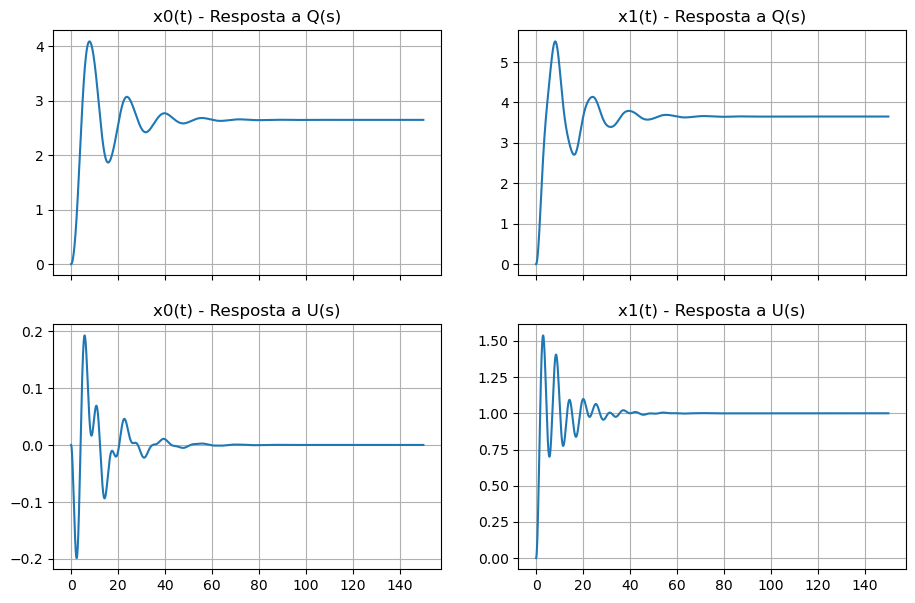

In [60]:
# Funções numéricas para plotar no numpy
x0_q_fun = sp.lambdify(t, x0_q, 'numpy')
x1_q_fun = sp.lambdify(t, x1_q, 'numpy')
x0_u_fun = sp.lambdify(t, x0_u, 'numpy')
x1_u_fun = sp.lambdify(t, x1_u, 'numpy')

# tempo 
t_end = 150.0
t_start = 0.0
t_step = 0.01
tt = np.linspace(t_start, t_end, int((t_end - t_start) / t_step) + 1)

fig, axs = plt.subplots(2, 2, figsize=(11, 7), sharex=True)

# x0 e x1
axs[0, 0].plot(tt, x0_q_fun(tt))
axs[0, 0].set_title('x0(t) - Resposta a Q(s)')
axs[0, 0].grid(True)

axs[0, 1].plot(tt, x1_q_fun(tt))
axs[0, 1].set_title('x1(t) - Resposta a Q(s)')
axs[0, 1].grid(True)

axs[1, 0].plot(tt, x0_u_fun(tt))
axs[1, 0].set_title('x0(t) - Resposta a U(s)')
axs[1, 0].grid(True)

axs[1, 1].plot(tt, x1_u_fun(tt))
axs[1, 1].set_title('x1(t) - Resposta a U(s)')
axs[1, 1].grid(True)


In [61]:
# Converter cada canal SymPy -> control.TransferFunction SISO (em s)

def sympy_frac_to_tf(expr_s, s_symbol):
    """Converte uma função racional em s (SymPy) -> control.TransferFunction SISO."""
    num, den = sp.fraction(sp.together(sp.simplify(expr_s)))
    num_poly = sp.Poly(num, s_symbol)
    den_poly = sp.Poly(den, s_symbol)

    # Coeficientes do maior para o menor grau
    num_cf = [float(c) for c in num_poly.all_coeffs()]
    den_cf = [float(c) for c in den_poly.all_coeffs()]
    return ctl.tf(num_cf, den_cf)

# Canais contínuos (SISO)
x0_u = sympy_frac_to_tf(H_U[0,0], s)
x0_q = sympy_frac_to_tf(H_Q[0,0], s)
x1_u = sympy_frac_to_tf(H_U[1,0], s)
x1_q = sympy_frac_to_tf(H_Q[1,0], s)
                          
# Discretizar para z^-1

def discretize_and_dump(sys_siso, T, label):
    sys_tf    = ctl.sample_system(sys_siso, T, method="zoh")

    num = sys_tf.num
    den = sys_tf.den
    if isinstance(num, list):
        num = num[0] if not isinstance(num[0], list) else num[0][0]
    if isinstance(den, list):
        den = den[0] if not isinstance(den[0], list) else den[0][0]

    # tem que dar round pra n ficar instavel a parada
    num = np.asarray(num, float).ravel()#.round(4)
    den = np.asarray(den, float).ravel()#.round(4)

    print(f"\n--- {label}")
    print("num:", num.tolist())
    print("den:", den.tolist())
    print("gain:", sys_tf.dcgain())
    print("Ts =", T)

    return ctl.TransferFunction(num, den, T)

# Dump de todos os 4 canais
T = 0.1 
sysd_x0_u = discretize_and_dump(x0_u, T, "X0/U")
sysd_x0_q = discretize_and_dump(x0_q, T, "X0/Q")
sysd_x1_u = discretize_and_dump(x1_u, T, "X1/U")
sysd_x1_q = discretize_and_dump(x1_q, T, "X1/Q")


--- X0/U
num: [-0.0009862757549177203, 0.0009986880756871486, 0.0009614511154469874, -0.0009738634362171927]
den: [1.0, -3.94858122307251, 5.860120466553711, -3.8742325829786175, 0.9627129408912003]
gain: -3.9648002881720886e-11
Ts = 0.1

--- X0/Q
num: [0.0016426613065565476, -0.0015851236210551178, -0.0016017410459663317, 0.0015961470539918032]
den: [1.0, -3.94858122307251, 5.860120466553711, -3.8742325829786175, 0.9627129408912003]
gain: 2.6499999999512895
Ts = 0.1

--- X1/U
num: [0.00496520088907193, -0.004886774314647013, -0.004896575919121293, 0.00483775073847903]
den: [1.0, -3.94858122307251, 5.860120466553711, -3.8742325829786175, 0.9627129408912003]
gain: 0.999999999926368
Ts = 0.1

--- X1/Q
num: [0.004980507200006201, -0.004824062610790492, -0.0049119226246259196, 0.004827023122720875]
den: [1.0, -3.94858122307251, 5.860120466553711, -3.8742325829786175, 0.9627129408912003]
gain: 3.649999999934298
Ts = 0.1


---
### Plot - Resposta ao impulso

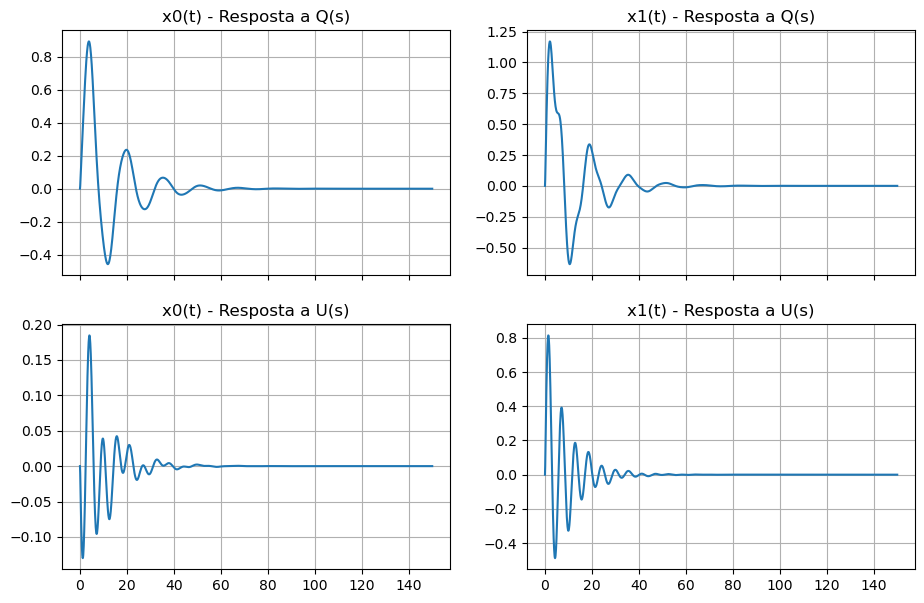

In [62]:
# funcao de transferencia da integral discreta Ts/(1 - z^-1)
delta = ctl.tf([T, 0], [1, -1], T)

# plota a resposta ao impulso discreta
t_x0_q_imp, y_x0_q_imp = ctl.impulse_response(sysd_x0_q, T=np.arange(t_start, t_end, T))
t_x1_q_imp, y_x1_q_imp = ctl.impulse_response(sysd_x1_q, T=np.arange(t_start, t_end, T))
t_x0_u_imp, y_x0_u_imp = ctl.impulse_response(sysd_x0_u, T=np.arange(t_start, t_end, T))
t_x1_u_imp, y_x1_u_imp = ctl.impulse_response(sysd_x1_u, T=np.arange(t_start, t_end, T))

fig, axs = plt.subplots(2, 2, figsize=(11, 7), sharex=True)

# x0 e x1
axs[0, 0].plot(t_x0_q_imp, y_x0_q_imp)
axs[0, 0].set_title('x0(t) - Resposta a Q(s)')
axs[0, 0].grid(True)

axs[0, 1].plot(t_x1_q_imp, y_x1_q_imp)
axs[0, 1].set_title('x1(t) - Resposta a Q(s)')
axs[0, 1].grid(True)

axs[1, 0].plot(t_x0_u_imp, y_x0_u_imp)
axs[1, 0].set_title('x0(t) - Resposta a U(s)')
axs[1, 0].grid(True)

axs[1, 1].plot(t_x1_u_imp, y_x1_u_imp)
axs[1, 1].set_title('x1(t) - Resposta a U(s)')
axs[1, 1].grid(True)

ValueError: x and y must have same first dimension, but have shapes (250,) and (1500,)

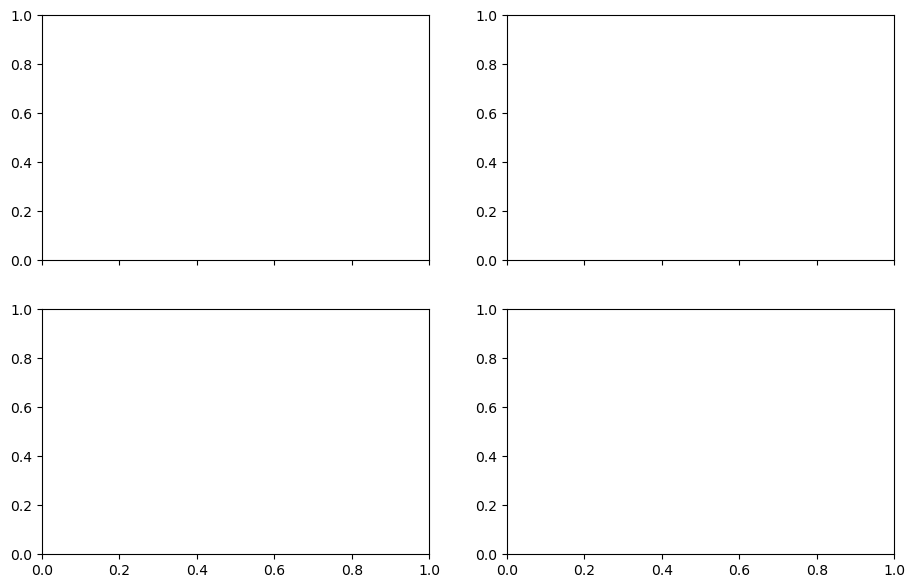

In [ ]:
F_x1_u, G_x1_u = generate_matrices(sysd_x1_u, N_u=10, N=1500)
F_x0_u, G_x0_u = generate_matrices(sysd_x0_u, N_u=10, N=1500)
F_x1_q, G_x1_q = generate_matrices(sysd_x1_q, N_u=10, N=1500)
F_x0_q, G_x0_q = generate_matrices(sysd_x0_q, N_u=10, N=1500)

# condições iniciais
y_x1_u_imp_0 = F_x1_u @ (y_x1_u_imp[1:5])[::-1]
y_x0_u_imp_0 = F_x0_u @ (y_x0_u_imp[1:5])[::-1]
y_x1_q_imp_0 = F_x1_q @ (y_x1_q_imp[1:5])[::-1]
y_x0_q_imp_0 = F_x0_q @ (y_x0_q_imp[1:5])[::-1]

fig, axs = plt.subplots(2, 2, figsize=(11, 7), sharex=True)
time = t_x0_q_imp[:1500]

# x0 e x1
axs[0, 0].plot(time, y_x0_q_imp_0)
axs[0, 0].set_title('x0(t) - Resposta a Q(s)')
axs[0, 0].grid(True)

axs[0, 1].plot(time, y_x1_q_imp_0)
axs[0, 1].set_title('x1(t) - Resposta a Q(s)')
axs[0, 1].grid(True)

axs[1, 0].plot(time, y_x0_u_imp_0)
axs[1, 0].set_title('x0(t) - Resposta a U(s)')
axs[1, 0].grid(True)

axs[1, 1].plot(time, y_x1_u_imp_0)
axs[1, 1].set_title('x1(t) - Resposta a U(s)')
axs[1, 1].grid(True)